# Assignment 1 - Matrix-matrix multiplication


In [1]:
import numpy as np
from timeit import timeit
import matplotlib.pylab as plt
%matplotlib inline

In this assignment, we will look at computing the product $AB$ of two matrices $A,B \in \mathbb{R}^{n \times m}$ . The following snippet of code defines a function that computes the product of two matrices.

In [2]:
def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()

## 1) A Faster Matrix Product

This function can be sped up by removing one of the for loops and replacing it with np.dot

In [4]:
def faster_matrix_product(mat1,mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for r in range(mat1.shape[0]):
        row = []
        for c in range(mat1.shape[0]):
            row.append(np.dot(mat1[r],mat2[:,c]))
        result.append(row)
    return np.array(result)

Next we will check that the function is giving the same output as the numpy function. If the cell below runs then the function works.

In [5]:
ns = [2,3,4,5]

for n in ns:
    matrix1 = np.random.rand(n, n)
    matrix2 = np.random.rand(n, n)
    
    assert np.allclose(faster_matrix_product(matrix1, matrix2), matrix1 @ matrix2)
    
    print(faster_matrix_product(matrix1, matrix2))
    print(matrix1 @ matrix2)

[[0.10626301 0.49572224]
 [0.03422239 0.16784943]]
[[0.10626301 0.49572224]
 [0.03422239 0.16784943]]
[[0.55323243 0.82685519 0.7841669 ]
 [1.00926161 0.93388614 0.66491814]
 [1.36146675 1.22596549 0.85912954]]
[[0.55323243 0.82685519 0.7841669 ]
 [1.00926161 0.93388614 0.66491814]
 [1.36146675 1.22596549 0.85912954]]
[[0.49326851 0.68684515 0.63309004 0.63533105]
 [0.77027162 1.03307369 0.91210764 0.801381  ]
 [0.61603787 0.78268373 0.57852594 0.47861235]
 [0.66825487 0.87077307 0.7128254  0.59451624]]
[[0.49326851 0.68684515 0.63309004 0.63533105]
 [0.77027162 1.03307369 0.91210764 0.801381  ]
 [0.61603787 0.78268373 0.57852594 0.47861235]
 [0.66825487 0.87077307 0.7128254  0.59451624]]
[[1.37367321 2.38522249 2.00742532 2.0438898  1.65497985]
 [1.57806592 1.72734367 1.46774724 1.69071224 1.09611187]
 [1.3171871  1.7778982  1.52521162 1.63351746 1.33830839]
 [1.48456948 2.16080868 2.18279672 1.81328352 1.61519337]
 [0.51436823 0.70070142 0.54491912 0.68330798 0.3744647 ]]
[[1.3736732

### Why is this function better?

The first reason this function is better is because it using less nested loops than the previous function. 

The second reason this function is better is because np.dot allows for SIMD to be used. Instead of multiplying each row in matrix 1 by each column in matrix 2 an element at a time, we are able to perform a single command and multiply all of the elements in a given row of the first matrix by the corresponding elements in the column of the second matrix (roughly 4 at a time). Therefore instead of doing $n$ individual operations for this step, it performs $n/4$ (generally).

### Timing the function

In [6]:
#Test the run time for each function for a range of matrix sizes
t_slow = []
t_fast = []
t_numpy = []

#We will time the slow function for matrices up to 250x250
for n in np.linspace(2,250,15,dtype='int'):
    #Create the matrices
    matrix1 = np.random.rand(n, n)
    matrix2 = np.random.rand(n, n)
    
    t_slow.append(timeit('slow_matrix_product(matrix1, matrix2)',globals=globals(),number=1))

#We will time the fast function for matrices up to 1000x1000
for n in np.linspace(2,1000,15,dtype='int'):
    #Create the matrices
    matrix1 = np.random.rand(n, n)
    matrix2 = np.random.rand(n, n)
        
    #Time the fast and numpy functions
    t_fast.append(timeit('faster_matrix_product(matrix1, matrix2)',globals=globals(),number=1))
    t_numpy.append(timeit('matrix1@matrix2',globals=globals(),number=1))

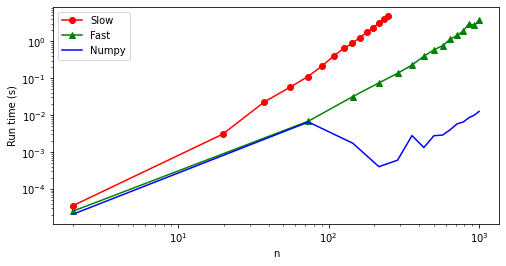

In [7]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(np.linspace(2,250,15),t_slow,"ro-")
ax.plot(np.linspace(2,1000,15),t_fast,"g^-")
ax.plot(np.linspace(2,1000,15),t_numpy,"b-")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("n")
ax.set_ylabel("Run time (s)")
ax.legend(["Slow","Fast","Numpy"])

plt.show()

## 2) Speeding Up With Numba

In [7]:
from numba import njit

In [8]:
@njit
def njit_matrix_product(mat1,mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = np.zeros((mat1.shape[0],mat2.shape[1]))
    for r in range(mat1.shape[0]):
        row = np.zeros(mat2.shape[1])
        for c in range(mat2.shape[1]):
            col[r] = np.dot(mat1[r],mat2[:,c])
        result[c] = column
    return np.transpose(result)

In [9]:
ns = [2,3,4,5]

for n in ns:
    matrix1 = np.random.rand(n, n)
    matrix2 = np.random.rand(n, n)
    
    assert np.allclose(njit_matrix_product(matrix1, matrix2), matrix1 @ matrix2)
    
    print(njit_matrix_product(matrix1, matrix2))
    print(matrix1 @ matrix2)

/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_67225/3848377276.py:9: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  column[r] = np.dot(mat1[r],mat2[:,c])


[[0.53423988 0.47135678]
 [0.415471   0.5376381 ]]
[[0.53423988 0.47135678]
 [0.415471   0.5376381 ]]
[[0.83021945 1.27817694 1.51677131]
 [0.69947984 1.0116778  0.92488648]
 [0.76225453 1.0871993  1.11979417]]
[[0.83021945 1.27817694 1.51677131]
 [0.69947984 1.0116778  0.92488648]
 [0.76225453 1.0871993  1.11979417]]
[[1.01406588 0.95817419 1.67313789 1.41259229]
 [0.80580985 0.57456859 1.14326831 1.16327461]
 [0.43776399 0.26341582 0.52419929 0.53598073]
 [1.30941813 1.52227581 2.12652225 1.14970488]]
[[1.01406588 0.95817419 1.67313789 1.41259229]
 [0.80580985 0.57456859 1.14326831 1.16327461]
 [0.43776399 0.26341582 0.52419929 0.53598073]
 [1.30941813 1.52227581 2.12652225 1.14970488]]
[[0.7936427  0.48848751 0.55979583 0.79212674 0.81347297]
 [1.01433976 1.03056574 1.45907656 1.05270648 1.14462227]
 [0.82786611 0.59608064 0.5777459  0.5819126  0.67851986]
 [1.05751621 0.59915678 0.46412581 0.50907267 0.68057728]
 [0.86066975 0.91098588 1.5373582  1.30994623 1.49976781]]
[[0.7936427

In [10]:
#Test the run time for the numba based function for a range of matrix sizes
t_njit = []

for n in np.linspace(2,1000,15,dtype='int'):
    #Create the matrices
    matrix1 = np.random.rand(n, n)
    matrix2 = np.random.rand(n, n)
        
    #Time the numba based function
    t_njit.append(timeit('njit_matrix_product(matrix1, matrix2)',globals=globals(),number=1))

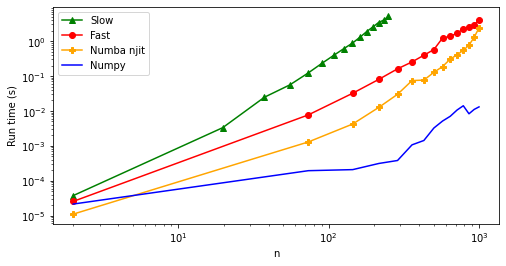

In [11]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(np.linspace(2,250,15),t_slow,"g^-")
ax.plot(np.linspace(2,1000,15),t_fast,"ro-")
ax.plot(np.linspace(2,1000,15),t_njit,"P-",color='orange')
ax.plot(np.linspace(2,1000,15),t_numpy,"b-")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("n")
ax.set_ylabel("Run time (s)")
ax.legend(["Slow","Fast","Numba njit","Numpy"])

plt.show()

In [12]:
#Test the run time for each function for a range of matrix sizes
t_cc = []
t_fc = []
t_cf = []
t_ff = []

for n in np.linspace(2,1000,15,dtype='int'):
    #Create the matrix and vector
    matrix1 = np.random.rand(n, n)
    matrix2 = np.random.rand(n, n)
    
    matrix1_f = np.asfortranarray(matrix1)
    matrix2_f = np.asfortranarray(matrix2)
        
    #Time the function for different orderings
    t_cc.append(timeit('njit_matrix_product(matrix1, matrix2)',globals=globals(),number=1))
    t_fc.append(timeit('njit_matrix_product(matrix1_f, matrix2)',globals=globals(),number=1))
    t_cf.append(timeit('njit_matrix_product(matrix1, matrix2_f)',globals=globals(),number=1))
    t_ff.append(timeit('njit_matrix_product(matrix1_f, matrix2_f)',globals=globals(),number=1))

/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_67225/3848377276.py:9: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  column[r] = np.dot(mat1[r],mat2[:,c])
/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_67225/3848377276.py:9: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, F))
  column[r] = np.dot(mat1[r],mat2[:,c])


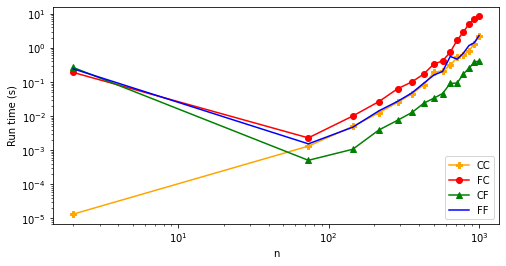

In [13]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(np.linspace(2,1000,15),t_cc,"P-",color='orange')
ax.plot(np.linspace(2,1000,15),t_fc,"ro-")
ax.plot(np.linspace(2,1000,15),t_cf,"g^-")
ax.plot(np.linspace(2,1000,15),t_ff,"b-")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("n")
ax.set_ylabel("Run time (s)")
ax.legend(["CC","FC","CF","FF"])

plt.show()

CF appears to be the quickest - this is what I would expect as np.dot() is doing a row multiplied by a column. The best way to perform this operation is to have all of the elements of each row in matrix 1 contiguous (next to each other in memory) - which is given by C styled ordering, and to have all of the elements of each column in matrix 2 next to each other in memory - given by F styled ordering. If this is not the case, for one or both of the matrices (as we can see with CC,FF and FC), then we are having to skip over bytes in memory to access the next column/row element before we can perform the computation. FC has the worst performance as we are having to skip over bytes in both matrix 1 as the columns elements have been stored next to each other, and in matrix 2 as the row elements have been stored next to each other.